In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from datetime import datetime

# Set the visual style for all matplotlib plots
# 'seaborn-v0_8-darkgrid' gives a clean grid background with subtle colors
plt.style.use('seaborn-v0_8-darkgrid')

# Set the color palette for seaborn plots
# "husl" = Hue-Saturation-Lightness - creates vibrant, distinct colors
sns.set_palette("husl")

In [2]:
df = pd.read_csv("weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [3]:
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (13200, 11)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
print(" Total rows:", len(df))
display(df.tail(3))

print(df['Weather Type'].value_counts())

 Total rows: 13200


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [5]:
print(df.dtypes)
print(df.describe())

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object
        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

   

In [6]:
missing = df.isnull().sum()  
print(missing)

if missing.sum() == 0:
    print("\n All good - no missing data!")
else:
    print(f"\n Total missing values: {missing.sum()}")

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

 All good - no missing data!


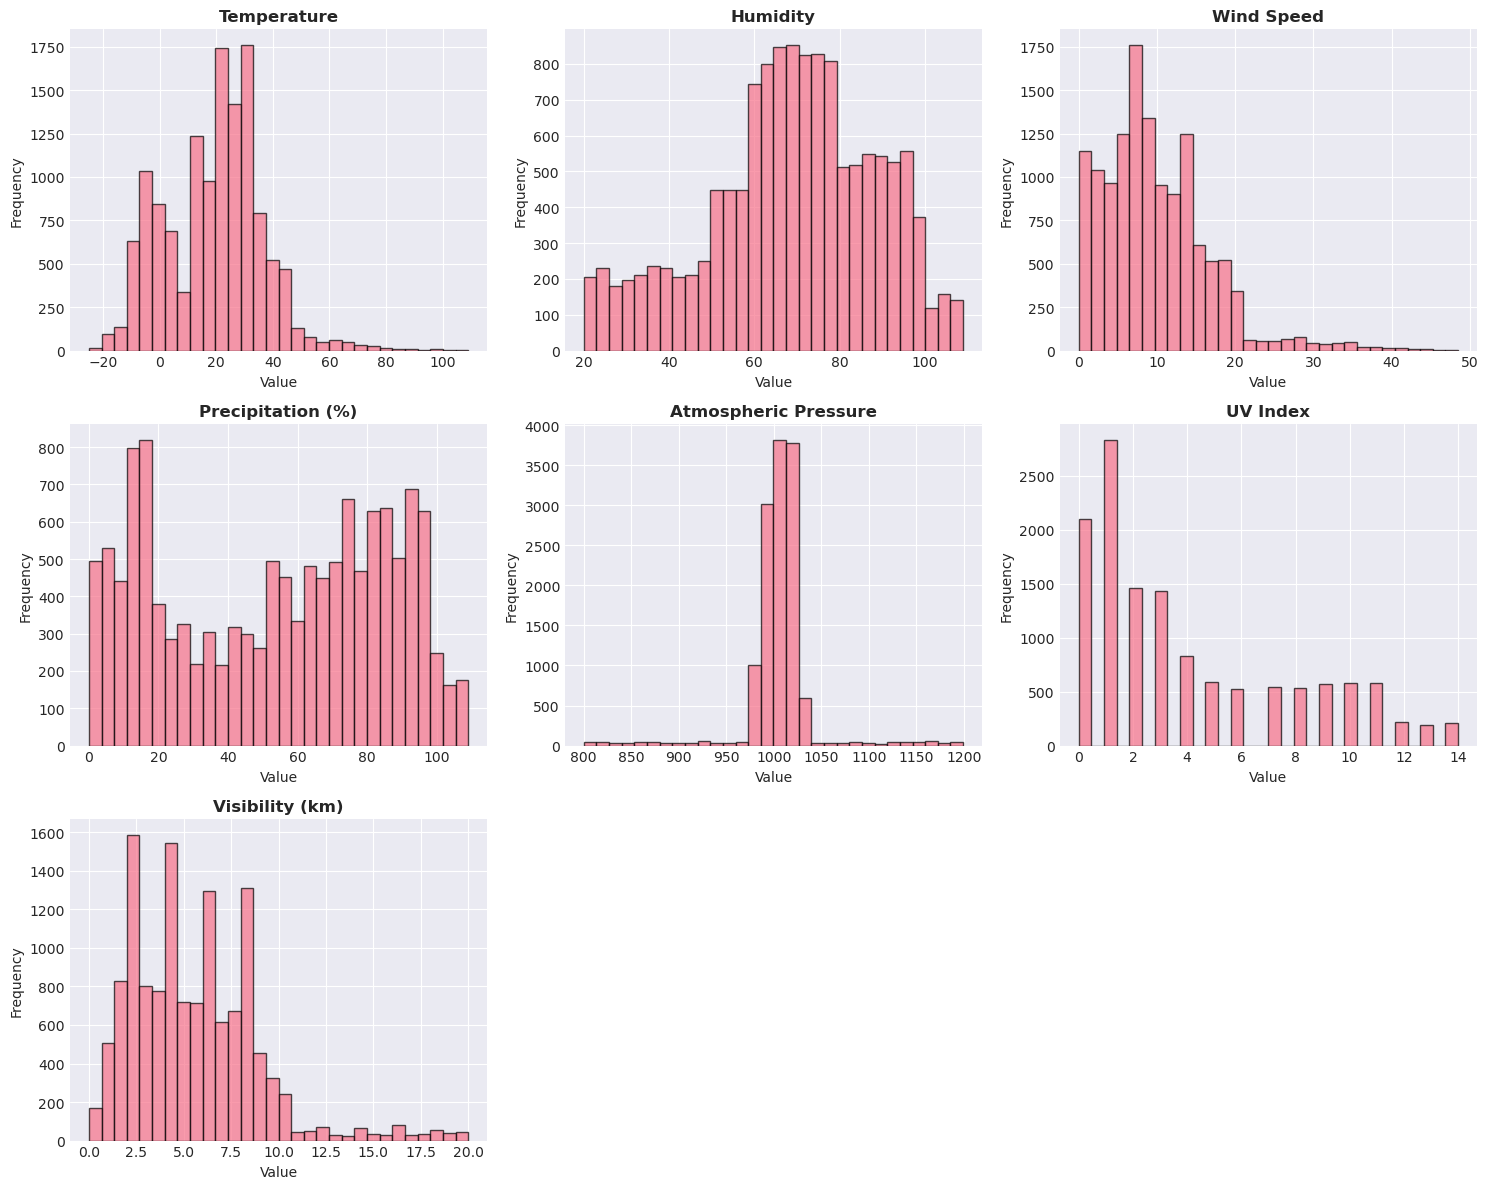

In [7]:
# numbers-based features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

num_features = ['Temperature', 'Humidity', 'Wind Speed', 
                'Precipitation (%)', 'Atmospheric Pressure', 
                'UV Index', 'Visibility (km)']

for i, feature in enumerate(num_features):
    ax = axes[i]
    df[feature].hist(ax=ax, bins=30, edgecolor='black', alpha=0.7)
    # ax=ax means "draw this histogram on THIS specific subplot"
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

for i in range(len(num_features), 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64


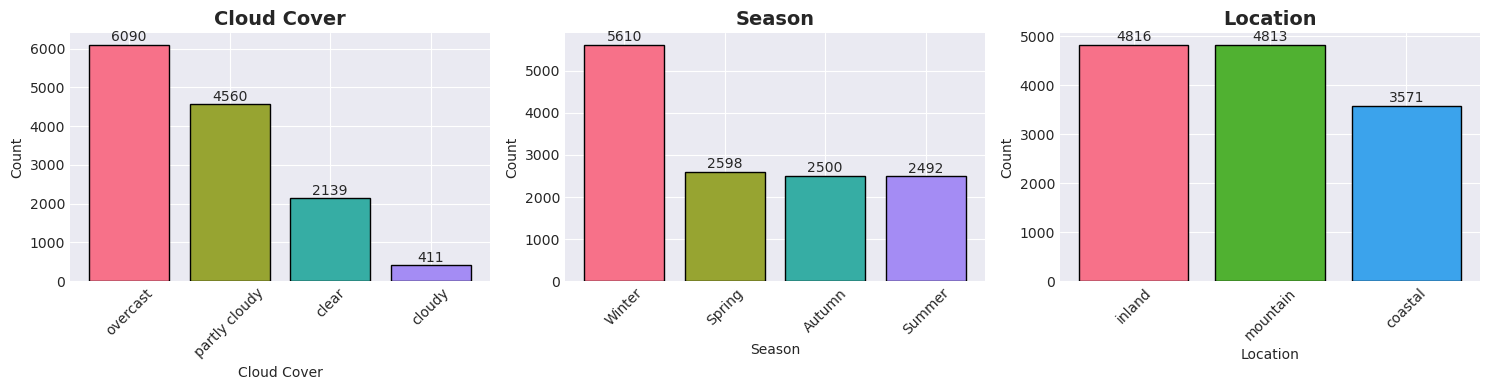

In [8]:
# text-based features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

cat_features = ['Cloud Cover', 'Season', 'Location']

for i, feature in enumerate(cat_features):
    ax = axes[i]
    counts = df[feature].value_counts()
    print(f"\n{counts}")

    bars = ax.bar(counts.index, counts.values, color=sns.color_palette("husl", len(counts)), edgecolor='black')
    
    ax.set_title(f'{feature}', fontsize=14, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
   
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [9]:
counts.index

Index(['inland', 'mountain', 'coastal'], dtype='object', name='Location')

In [10]:
counts.values

array([4816, 4813, 3571])

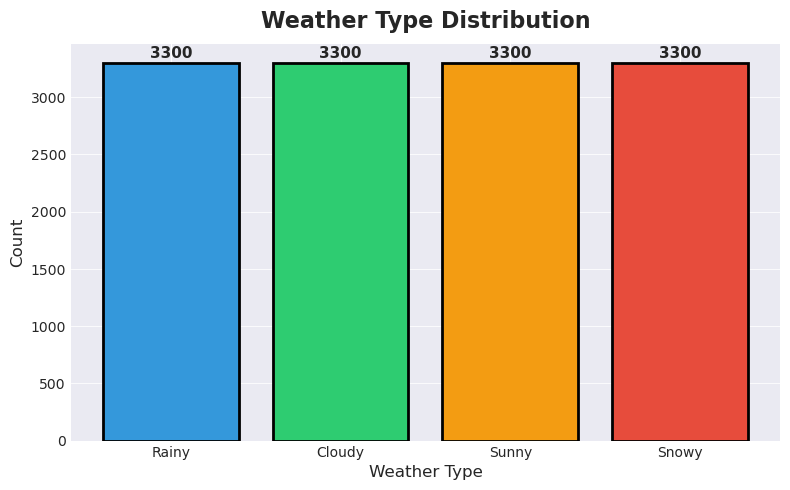

In [11]:
plt.figure(figsize=(8, 5))

weather_counts = df['Weather Type'].value_counts()
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']  # Blue, Green, Orange, Red

bars = plt.bar(weather_counts.index, weather_counts.values, color=colors, edgecolor='black', linewidth=2)

plt.title('Weather Type Distribution', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Weather Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [12]:
X = df.drop('Weather Type', axis=1)  # Everything EXCEPT weather type
y = df['Weather Type']               # JUST weather type (what we predict)

print("Feature shape (X):", X.shape)
print("Target shape (y):", y.shape)
print("\n Feature columns:")
print(X.columns.tolist())

Feature shape (X): (13200, 10)
Target shape (y): (13200,)

 Feature columns:
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # Makes split reproducible (same every time)
    stratify=y          # Keeps same class proportions in both sets
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set:  {X_test.shape[0]} samples")
print(f"\nTraining target distribution:")
print(y_train.value_counts(normalize=True).round(3))  # normalize=True -> Shows percentages, not counts

Training set: 10560 samples
Testing set:  2640 samples

Training target distribution:
Weather Type
Snowy     0.25
Sunny     0.25
Rainy     0.25
Cloudy    0.25
Name: proportion, dtype: float64


In [14]:
# Numbers → Need scaling (SVM is sensitive to feature magnitudes)
# Text → Need encoding (SVM can't read words, needs numbers)
num_features = ['Temperature', 'Humidity', 'Wind Speed', 
                'Precipitation (%)', 'Atmospheric Pressure', 
                'UV Index', 'Visibility (km)']

cat_features = ['Cloud Cover', 'Season', 'Location']

print("Numerical features:", num_features)
print("Categorical features:", cat_features)
print(f"Total features: {len(num_features) + len(cat_features)}")
print(f"Check: Should match original {X.shape[1]} columns")

Numerical features: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
Categorical features: ['Cloud Cover', 'Season', 'Location']
Total features: 10
Check: Should match original 10 columns


In [15]:
preprocessor = ColumnTransformer(                   # Structure: (name, transformer, columns)
    transformers=[
        ('num', StandardScaler(), num_features),    # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), cat_features)  # Encode categorical
    ])

print("Preprocessor created!")
print(f"Steps: 1) Scale {len(num_features)} numerical features")  # [0, 0] = Spring, [1, 0] = Summer, [0, 1] = Autumn
print(f"       2) One-hot encode {len(cat_features)} categorical features")

Preprocessor created!
Steps: 1) Scale 7 numerical features
       2) One-hot encode 3 categorical features


In [16]:
X_train_processed = preprocessor.fit_transform(X_train)

print("Training data processed!")
print(f"Original shape: {X_train.shape}")
print(f"Processed shape: {X_train_processed.shape}")
print("\nWhat happened:")
print("- Numerical features: Scaled (mean=0, std=1)")
print("- Categorical features: One-hot encoded")
print(f"- Total features now: {X_train_processed.shape[1]}")

Training data processed!
Original shape: (10560, 10)
Processed shape: (10560, 15)

What happened:
- Numerical features: Scaled (mean=0, std=1)
- Categorical features: One-hot encoded
- Total features now: 15


In [17]:
X_test_processed = preprocessor.transform(X_test)  # NOTICE: only transform, not fit!

print("Test data processed!")
print(f"Test shape: {X_test_processed.shape}")
print("\nImportant: Used same parameters from training")
print("- Same mean/std for scaling")
print("- Same categories for encoding")
print("- No refitting on test data!")

Test data processed!
Test shape: (2640, 15)

Important: Used same parameters from training
- Same mean/std for scaling
- Same categories for encoding
- No refitting on test data!


In [18]:
svm_model = SVC(
    kernel='rbf',          # Radial Basis Function - handles complex patterns
    C=1.0,                 # Regularization parameter (start moderate)
    gamma='scale',         # Kernel coefficient (auto-scaled)
    random_state=42,       # Reproducible results
    verbose=True           # Shows training progress (cool to watch!)
)

print("SVM Model Created!")
print(f"Kernel: {svm_model.kernel}")
print(f"C: {svm_model.C}")
print(f"Gamma: {svm_model.gamma}")

SVM Model Created!
Kernel: rbf
C: 1.0
Gamma: scale


In [19]:
print("Training SVM... (this might take a minute)")
svm_model.fit(X_train_processed, y_train)

print("\nTraining complete!")
print(f"Model trained on {X_train_processed.shape[0]} samples")
print(f"With {X_train_processed.shape[1]} features each")

Training SVM... (this might take a minute)
[LibSVM].*
optimization finished, #iter = 1424
obj = -788.417911, rho = -0.149431
nSV = 1040, nBSV = 845
*
optimization finished, #iter = 902
obj = -389.355614, rho = 0.042946
nSV = 586, nBSV = 414
.*
optimization finished, #iter = 1508
obj = -632.872099, rho = -0.031051
nSV = 933, nBSV = 701
*
optimization finished, #iter = 952
obj = -433.197070, rho = 0.107643
nSV = 653, nBSV = 500
*.*
optimization finished, #iter = 1145
obj = -480.175067, rho = 0.017619
nSV = 730, nBSV = 530
*
optimization finished, #iter = 918
obj = -369.408881, rho = 0.026322
nSV = 566, nBSV = 383
Total nSV = 2262

Training complete!
Model trained on 10560 samples
With 15 features each


In [20]:
# Test our trained model
print("Making predictions on test data...")
y_pred = svm_model.predict(X_test_processed)

print("Predictions ready!")
print(f"First 5 predictions: {y_pred[:5]}")
print(f"First 5 actual:      {y_test.values[:5]}")
print(f"\nSample comparison:")
for i in range(5):
    print(f"  Sample {i+1}: Predicted = {y_pred[i]}, Actual = {y_test.values[i]}")

Making predictions on test data...
Predictions ready!
First 5 predictions: ['Rainy' 'Cloudy' 'Sunny' 'Rainy' 'Sunny']
First 5 actual:      ['Rainy' 'Cloudy' 'Sunny' 'Rainy' 'Cloudy']

Sample comparison:
  Sample 1: Predicted = Rainy, Actual = Rainy
  Sample 2: Predicted = Cloudy, Actual = Cloudy
  Sample 3: Predicted = Sunny, Actual = Sunny
  Sample 4: Predicted = Rainy, Actual = Rainy
  Sample 5: Predicted = Sunny, Actual = Cloudy


In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Overall Accuracy: 90.80%

Classification Report:
              precision    recall  f1-score   support

      Cloudy      0.845     0.909     0.876       660
       Rainy      0.906     0.909     0.908       660
       Snowy      0.952     0.908     0.929       660
       Sunny      0.936     0.906     0.921       660

    accuracy                          0.908      2640
   macro avg      0.910     0.908     0.908      2640
weighted avg      0.910     0.908     0.908      2640



<Figure size 800x600 with 0 Axes>

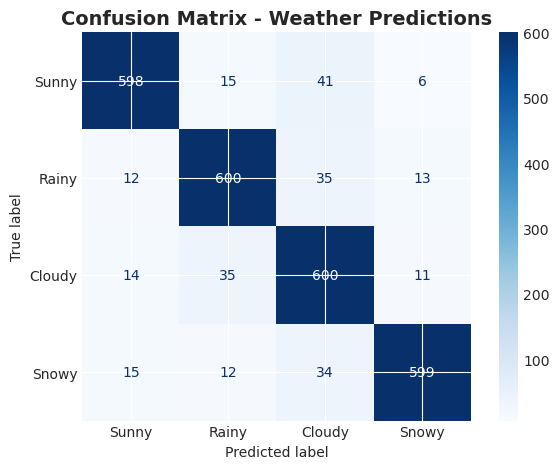

In [22]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=['Sunny', 'Rainy', 'Cloudy', 'Snowy'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                               display_labels=['Sunny', 'Rainy', 'Cloudy', 'Snowy'])

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Weather Predictions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

🔍 Calculating feature importance...

🏆 Top 10 Most Important Features:
  Temperature                    → Importance: 0.2234
  Precipitation (%)              → Importance: 0.1204
  Visibility (km)                → Importance: 0.1203
  UV Index                       → Importance: 0.1061
  Cloud Cover_overcast           → Importance: 0.0978
  Cloud Cover_partly cloudy      → Importance: 0.0534
  Atmospheric Pressure           → Importance: 0.0355
  Wind Speed                     → Importance: 0.0196
  Humidity                       → Importance: 0.0177
  Season_Winter                  → Importance: 0.0039


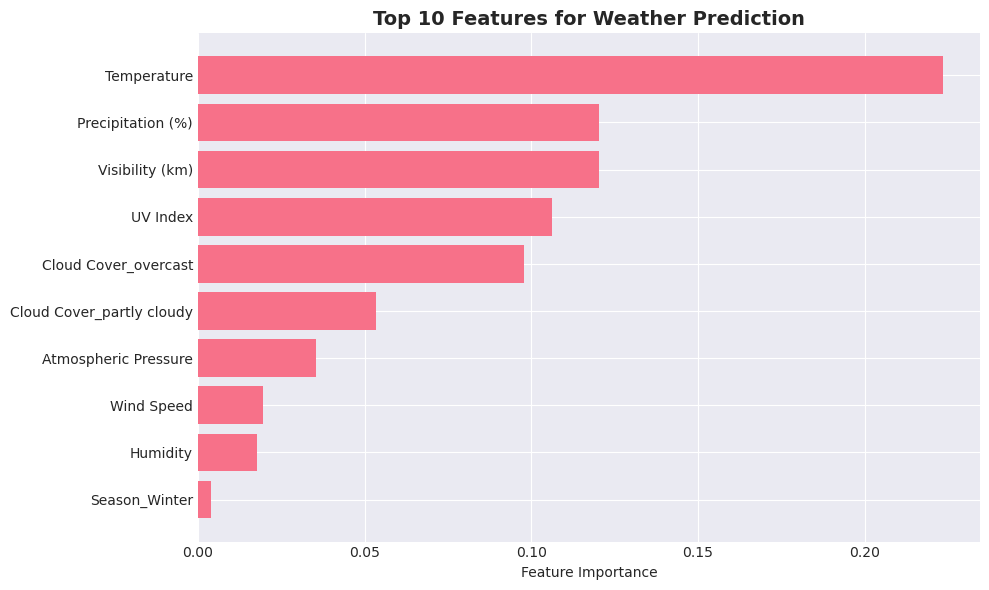

In [23]:
print("🔍 Calculating feature importance...")
result = permutation_importance(svm_model, X_test_processed, y_test,
                                n_repeats=10, random_state=42)

# Get feature names after preprocessing
num_feature_names = num_features  # 7 numerical features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# Sort by importance
importances = result.importances_mean
sorted_idx = importances.argsort()[::-1]  # index-vise Descending order not amount-vise

print("\n🏆 Top 10 Most Important Features:")
for i in sorted_idx[:10]:
    print(f"  {all_feature_names[i]:30} → Importance: {importances[i]:.4f}")

# Plot top features
plt.figure(figsize=(10, 6))
top_n = 10
plt.barh(range(top_n), importances[sorted_idx[:top_n]][::-1])
plt.yticks(range(top_n), [all_feature_names[i] for i in sorted_idx[:top_n]][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features for Weather Prediction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
final_accuracy = accuracy_score(y_test, y_pred)
print("="*50)
print("FINAL MODEL SUMMARY")
print("="*50)
print(f"Model Type: SVM with RBF kernel")
print(f"Accuracy: {final_accuracy:.2%}")
print(f"Training Samples: {X_train.shape[0]:,}")
print(f"Test Samples: {X_test.shape[0]:,}")
print(f"Features: {X_train_processed.shape[1]} (after preprocessing)")
print(f"Support Vectors: {svm_model.n_support_.sum():,} out of {X_train.shape[0]:,}")
print(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

# Save the model for future use
model_filename = f"weather_svm_model_{datetime.now().strftime('%Y%m%d_%H%M')}.pkl"
joblib.dump(svm_model, model_filename)
print(f"\nModel saved as: {model_filename}")

# Save preprocessor too
preprocessor_filename = f"weather_preprocessor_{datetime.now().strftime('%Y%m%d_%H%M')}.pkl"
joblib.dump(preprocessor, preprocessor_filename)
print(f"Preprocessor saved as: {preprocessor_filename}")

print("\nAll done! You now have a weather prediction SVM!")

FINAL MODEL SUMMARY
Model Type: SVM with RBF kernel
Accuracy: 90.80%
Training Samples: 10,560
Test Samples: 2,640
Features: 15 (after preprocessing)
Support Vectors: 2,262 out of 10,560
Date: 2026-02-04 07:55

Model saved as: weather_svm_model_20260204_0755.pkl
Preprocessor saved as: weather_preprocessor_20260204_0755.pkl

All done! You now have a weather prediction SVM!
